In [115]:
%matplotlib inline
%config InlineBackend.close_figures=False 
import ipywidgets as widgets
from IPython.display import display,clear_output, Audio
from sklearn.metrics import confusion_matrix
from ipywidgets import HBox, VBox, Layout
import matplotlib.pyplot as plt
from datetime import datetime
from random import shuffle
import sounddevice as sd
import pandas as pd
import numpy as np
import wavio
import time
import os


# Import classes and init random indexes
results = {'index': [],
           'truth': [],
           'prediction': [],
           'issue': []}
df_summary = pd.read_csv('kitchen20.csv')
rand_idxs = list(range(len(df_summary)))
shuffle(rand_idxs)
name = None

# Read audio fuction
def play(idx):
    row = df_summary.loc[idx]
    audioRate = 44100
    sound = wavio.read(row.path).data.T[0]
    sd.play(sound, audioRate)
    
    
def save(df_results, name):
    if not os.path.exists('./results'):
        os.makedirs('./results')
    df_results.to_csv('./results/{}_{:%y%m%d_%T}.csv'.format(
        name, datetime.now()))
    print('Saved')

    
def plot_confusion_matrix(y_true, y_pred, classes,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    fig, ax = plt.subplots(figsize=(10,9))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


#######################
# Instantiate the UI

### Class buttons
class_buttons = widgets.ToggleButtons(
    options=['blender', 'boiling-water', 'book', 'chopping', 'clean-dishes',
             'cupboard', 'cutlery', 'dishwasher', 'drawer', 'eat', 'fridge',
             'frying-pan', 'juicer', 'microwave', 'peel', 'plates', 'stove-burner',
             'stove-fan', 'sweep', 'water-flowing'],
    description='Class:')

### Play button    
play_button = widgets.Button(
    description='replay audio {}  -  1/80'.format(rand_idxs[-1]),
    layout=Layout(width='auto'))

@play_button.on_click
def play_audio(b):
    play(rand_idxs[-1])

### Issue text
issue_text = widgets.Text(
    description='Report issue:',
    value='',
    continus_update=True,
    disabled=False)

### Answer button
answer_button = widgets.Button(
    description='',
    layout=Layout(width='auto'))

### Next button
next_button = widgets.Button(
    description='Next',
    layout=Layout(width='auto'))

@next_button.on_click
def next_audio(b):
    # Record prediction
    played_idx = rand_idxs[-1]
    results['index'].append(played_idx)
    results['truth'].append(df_summary.category[played_idx])
    results['prediction'].append(class_buttons.value)
    results['issue'].append(issue_text.value)
    
    # Show answer
    answer_button.layout.visibility = 'visible'
    answer_button.description = df_summary.category[played_idx]
    if df_summary.category[played_idx] == class_buttons.value:
        answer_button.style.button_color = 'lightgreen'
    else:
        answer_button.style.button_color = 'red'
    time.sleep(1)
    answer_button.layout.visibility = 'hidden'

    # Change current index
    rand_idxs.pop()
    counter = len(df_summary) - len(rand_idxs) + 1
    
    # Update view
    if counter <= 80:
        play(rand_idxs[-1])
        play_button.description='replay audio {}  -  {}/80'.format(
            rand_idxs[-1], counter)
        next_button.layout.visibility = 'hidden'
        issue_text.value = ''
        time.sleep(4)
        next_button.layout.visibility = 'visible'
    else:  # End game
        tab.layout.visibility = 'hidden'
        next_button.layout.visibility = 'hidden'
        df_results = pd.DataFrame(results)
        save(df_results, name)
        classes = list(set(df_results.truth.append(df_results.prediction)))
        y_test = [classes.index(c) for c in df_results.truth]
        y_pred = [classes.index(c) for c in df_results.prediction]
        plot_confusion_matrix(y_test, y_pred, classes=classes)
        acc = (np.array(y_test) == np.array(y_pred)).mean() * 100
        print('Your accuracy is {}%'.format(acc))
        print('Thaaaaaank youuuuuu :D')
    
# Define visual box
tab = VBox(children=[play_button,
                     class_buttons,
                     issue_text,
                     next_button,
                     answer_button])

print("This is going to last in between 10 and 15 minutes")
name = input('What is your name ?')
display(tab)
play(rand_idxs[-1])

This is going to last in between 10 and 15 minutes


KeyboardInterrupt: 

---
## Show the leader-board

In [36]:
from glob import glob

def load_all_results(fPattern='./results/*.csv'):
    dfs = {}
    for fPath in glob(fPattern):
        df = pd.read_csv(fPath)
        name = fPath[10:].split('_')[0]
        dfs[name] = df
    return dfs

dfs = load_all_results()
for name, df in dfs.items():
    print('{} scored {}'.format(
            name, 
            (df.truth == df.prediction).mean() * 100) )

print('--')
df_overall = pd.concat(dfs)
print('Overllalls', (df_overall.truth == df_overall.prediction).mean() * 100)

Maëva scored 77.5
aMazel scored 81.25
Hugo Caselles-Dupré scored 91.25
Mehdi scored 66.25
mina scored 73.41772151898735
Bahar scored 78.75
MESLOUH scored 90.0
Max scored 80.0
Alban scored 81.25
Manu scored 83.75
Giuseppe scored 81.25
AgentWallE scored 78.75
Tom scored 72.5
Ferran scored 77.5
marc scored 94.91525423728814
--
Overllalls 80.3056027164686


## Show the intra-session accuracy trend

You'll notice how the accuracy increasess after some iterations, surely when the user becomes used to the task

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


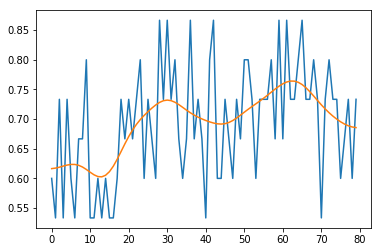

In [110]:
from scipy.ndimage.filters import gaussian_filter1d

df_overall['acc'] = (df_overall.truth == df_overall.prediction) * 1

fig, ax = plt.subplots()
accs = np.zeros(80)
for name in df_overall.index.levels[0]:
    acc = df_overall.loc[name].acc
    acc = np.nan_to_num(acc)
    if acc.shape == accs.shape:
        accs += acc

accs = accs / len(df_overall.index.levels[0])
ax.plot(accs)
ysmoothed = gaussian_filter1d(accs, sigma=4)
ax.plot(ysmoothed)